In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

C:\Users\Adil Qureshi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Adil Qureshi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Adil Qureshi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Adil Qureshi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.

In [2]:
img_width = 150
img_height = 150

train_data_dir = 'dogs-vs-cats/train'
validation_data_dir = 'dogs-vs-cats/valid'
train_samples = 120
validation_samples = 30
epochs = 5
batch_size = 20

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(lr=.0001),
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [8]:

print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


In [9]:

imgs, labels = next(train_generator)

In [10]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
0.0


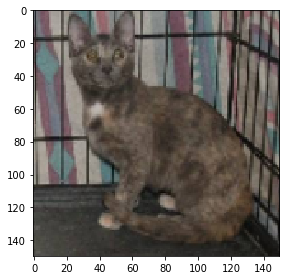

1.0


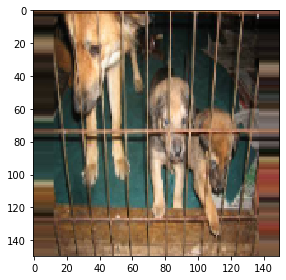

1.0


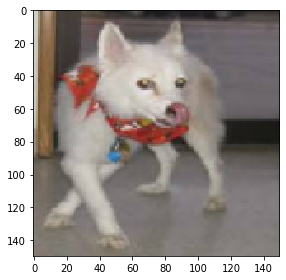

1.0


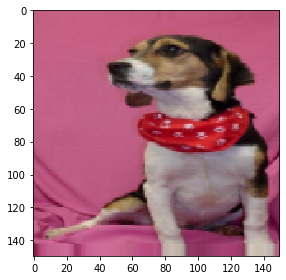

0.0


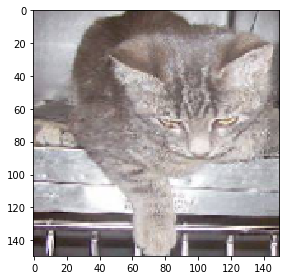

0.0


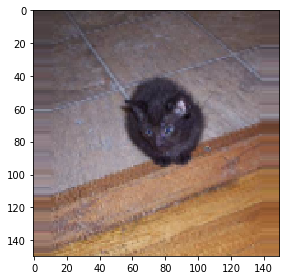

0.0


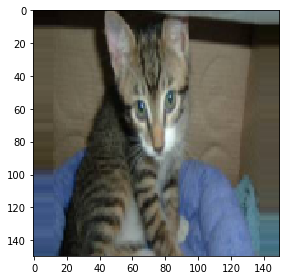

1.0


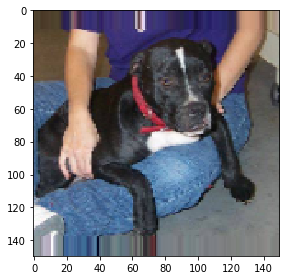

0.0


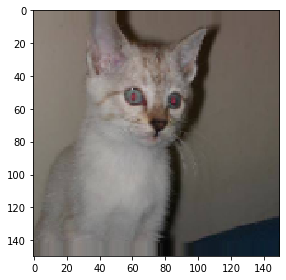

0.0


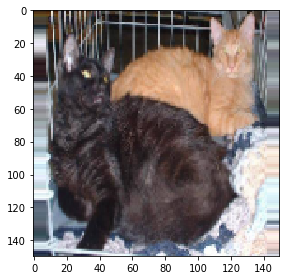

0.0


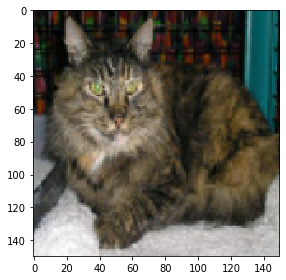

1.0


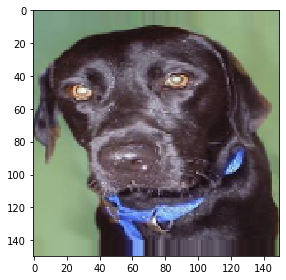

1.0


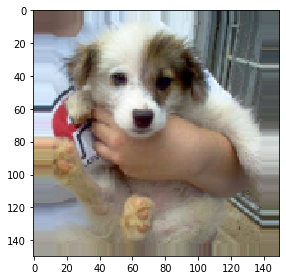

0.0


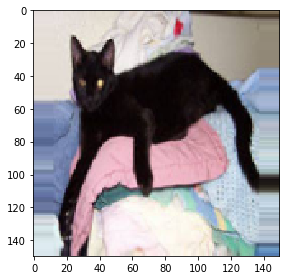

1.0


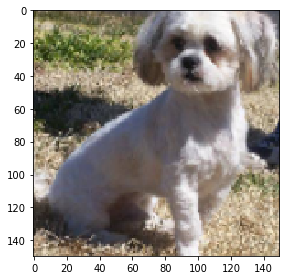

1.0


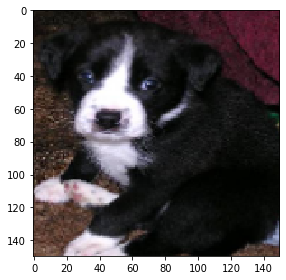

1.0


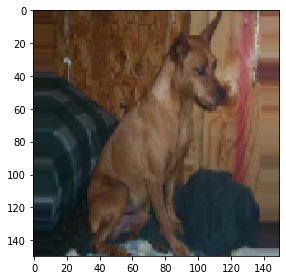

0.0


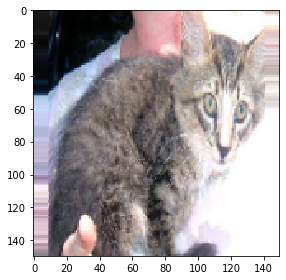

1.0


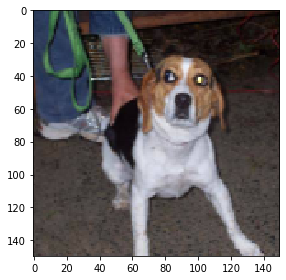

0.0


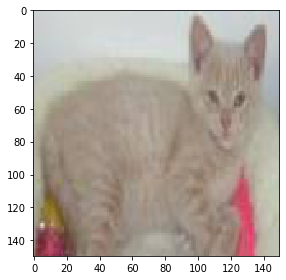

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [12]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 200 images belonging to 2 classes.


In [13]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/5
6/6 [==============================] - 2s 378ms/step - loss: 0.7014 - acc: 0.5083 - val_loss: 0.7011 - val_acc: 0.5000
Epoch 2/5
6/6 [==============================] - 2s 275ms/step - loss: 0.7001 - acc: 0.5417 - val_loss: 0.7068 - val_acc: 0.5000
Epoch 3/5
6/6 [==============================] - 2s 276ms/step - loss: 0.7056 - acc: 0.5250 - val_loss: 0.6953 - val_acc: 0.5000
Epoch 4/5
6/6 [==============================] - 2s 284ms/step - loss: 0.6940 - acc: 0.5167 - val_loss: 0.6929 - val_acc: 0.5500
Epoch 5/5
6/6 [==============================] - 2s 277ms/step - loss: 0.6804 - acc: 0.5583 - val_loss: 0.6923 - val_acc: 0.5000


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


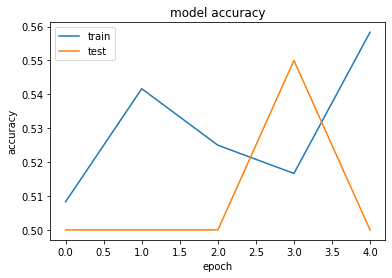

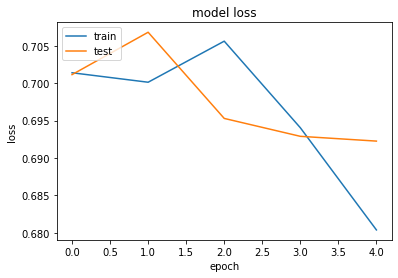

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
predict_dir_path='dogs-vs-cats/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['cat.10085.jpg', 'cat.10141.jpg', 'cat.10208.jpg', 'cat.10373.jpg', 'cat.10508.jpg', 'cat.1064.jpg', 'cat.10765.jpg', 'cat.10786.jpg', 'cat.10826.jpg', 'cat.10985.jpg', 'cat.11200.jpg', 'cat.11435.jpg', 'cat.11457.jpg', 'cat.11763.jpg', 'cat.11866.jpg', 'cat.12091.jpg', 'cat.12230.jpg', 'cat.12274.jpg', 'cat.1588.jpg', 'cat.1668.jpg', 'cat.1973.jpg', 'cat.208.jpg', 'cat.2124.jpg', 'cat.2613.jpg', 'cat.2879.jpg', 'cat.2945.jpg', 'cat.3623.jpg', 'cat.3648.jpg', 'cat.4206.jpg', 'cat.4373.jpg', 'cat.5436.jpg', 'cat.5490.jpg', 'cat.5895.jpg', 'cat.5993.jpg', 'cat.6018.jpg', 'cat.6484.jpg', 'cat.6545.jpg', 'cat.6647.jpg', 'cat.6799.jpg', 'cat.6864.jpg', 'cat.7404.jpg', 'cat.7440.jpg', 'cat.747.jpg', 'cat.7615.jpg', 'cat.7697.jpg', 'cat.8845.jpg', 'cat.8977.jpg', 'cat.9065.jpg', 'cat.9422.jpg', 'cat.9883.jpg', 'dog.1001.jpg', 'dog.10298.jpg', 'dog.10695.jpg', 'dog.10892.jpg', 'dog.11228.jpg', 'dog.11248.jpg', 'dog.11361.jpg', 'dog.11381.jpg', 'dog.11392.jpg', 'dog.11405.jpg', 'dog.11641.jpg'

In [16]:
# predict images
from tensorflow.keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

cat.10085.jpg: dog
cat.10141.jpg: dog
cat.10208.jpg: dog
cat.10373.jpg: dog
cat.10508.jpg: dog
cat.1064.jpg: dog
cat.10765.jpg: dog
cat.10786.jpg: dog
cat.10826.jpg: dog
cat.10985.jpg: dog
cat.11200.jpg: dog
cat.11435.jpg: dog
cat.11457.jpg: dog
cat.11763.jpg: dog
cat.11866.jpg: dog
cat.12091.jpg: dog
cat.12230.jpg: dog
cat.12274.jpg: dog
cat.1588.jpg: dog
cat.1668.jpg: dog
cat.1973.jpg: dog
cat.208.jpg: dog
cat.2124.jpg: dog
cat.2613.jpg: dog
cat.2879.jpg: dog
cat.2945.jpg: dog
cat.3623.jpg: dog
cat.3648.jpg: dog
cat.4206.jpg: dog
cat.4373.jpg: dog
cat.5436.jpg: dog
cat.5490.jpg: dog
cat.5895.jpg: dog
cat.5993.jpg: dog
cat.6018.jpg: dog
cat.6484.jpg: dog
cat.6545.jpg: dog
cat.6647.jpg: dog
cat.6799.jpg: dog
cat.6864.jpg: dog
cat.7404.jpg: dog
cat.7440.jpg: dog
cat.747.jpg: dog
cat.7615.jpg: dog
cat.7697.jpg: dog
cat.8845.jpg: dog
cat.8977.jpg: dog
cat.9065.jpg: dog
cat.9422.jpg: dog
cat.9883.jpg: dog
dog.1001.jpg: dog
dog.10298.jpg: dog
dog.10695.jpg: dog
dog.10892.jpg: dog
dog.11228.